## Install MMDetection

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 819.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 44.8 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.9.0+cu111 which is incompatible.
torchaudio 0.13.1+cu116 requires torch=

In [ ]:
from mmcv import collect_env
collect_env()

/usr/local/lib/python3.9/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


{'sys.platform': 'linux',
 'Python': '3.9.16 (main, Dec  7 2022, 01:11:51) [GCC 9.4.0]',
 'CUDA available': True,
 'GPU 0': 'Tesla T4',
 'CUDA_HOME': '/usr/local/cuda',
 'NVCC': 'Cuda compilation tools, release 11.8, V11.8.89',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,c

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

## Perform Inference with An MMDet detector



In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth \
      -O checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth

# # !wget -c https://download.openmmlab.com/mmdetection/v2.0/mask2former/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_20220504_001756-743b7d99.pth \
# #        -O checkpoints/mask2former_swin-bca068ab.pth
# !wget -c https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth \
#        -O checkpoints/yolox_x_8x8_300e_coco_20211126_140254-bca068ab.pth



--2023-03-29 14:05:43--  https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.66.214, 163.181.66.213, 163.181.66.216, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.66.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 396898755 (379M) [application/octet-stream]
Saving to: ‘checkpoints/yolox_x_8x8_300e_coco_20211126_140254-bca068ab.pth’

checkpoints/yolox_x 100%[===================>] 378.51M  7.63MB/s    in 52s     

2023-03-29 14:06:35 (7.31 MB/s) - ‘checkpoints/yolox_x_8x8_300e_coco_20211126_140254-bca068ab.pth’ saved [396898755/396898755]



In [ ]:
# !pip install mmcls
import mmcv
from mmcv.runner import load_checkpoint
# import mmcls
from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
# config = 'configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco.py'
# # Setup a checkpoint file to load
# checkpoint = 'checkpoints/faster_rcnn_r50_caffe_fpn_mstrain_3x_coco_20210526_095054-1f77628b.pth'

# config = 'configs/mask2former/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco.py'
# checkpoint = 'checkpoints/mask2former_swin-bca068ab.pth'


config = 'configs/yolox/yolox_x_8x8_300e_coco.py'
checkpoint = 'checkpoints/yolox_x_8x8_300e_coco_20211126_140254-bca068ab.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
# config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: checkpoints/yolox_x_8x8_300e_coco_20211126_140254-bca068ab.pth


YOLOX(
  (backbone): CSPDarknet(
    (stem): Focus(
      (conv): ConvModule(
        (conv): Conv2d(12, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (activate): Swish()
      )
    )
    (stage1): Sequential(
      (0): ConvModule(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (activate): Swish()
      )
      (1): CSPLayer(
        (main_conv): ConvModule(
          (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (activate): Swish()
        )
        (short_conv): ConvModule(
          (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


demo/input/58174_001792_Sideline_0_H65.jpg


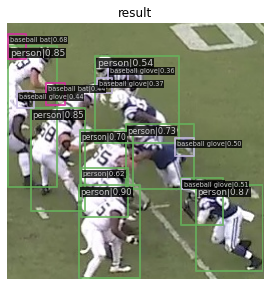

demo/input/58174_001792_Sideline_10_H17.jpg


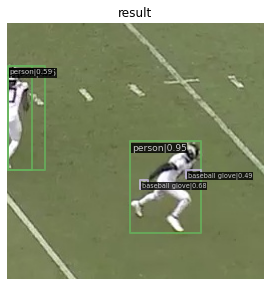

demo/input/58174_001792_Sideline_10_H60.jpg


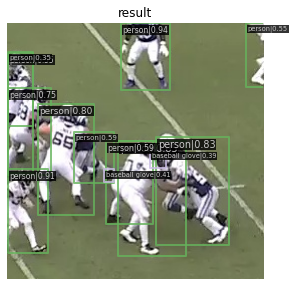

demo/input/58174_001792_Sideline_10_H68.jpg


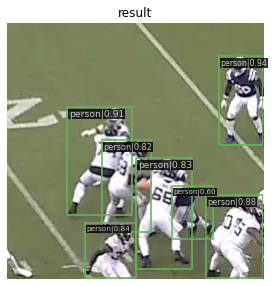

demo/input/58174_001792_Sideline_10_H74.jpg


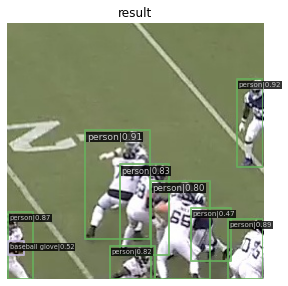

demo/input/58174_001792_Sideline_10_H88.jpg


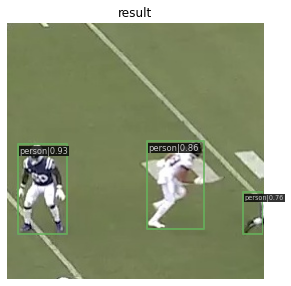

demo/input/58174_001792_Sideline_10_V50.jpg


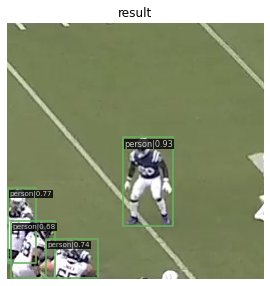

demo/input/58174_001792_Sideline_10_V54.jpg


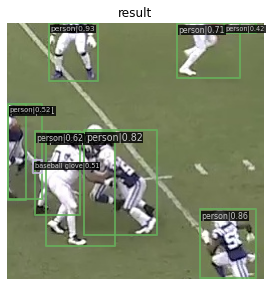

demo/input/58174_001792_Sideline_10_V90.jpg


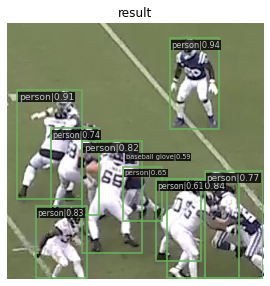

demo/input/58174_001792_Sideline_10_V99.jpg


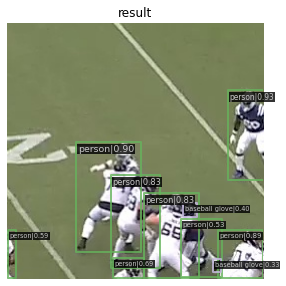

demo/input/58176_002844_Sideline_30_H25.jpg


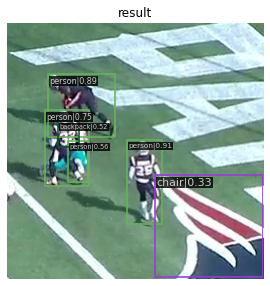

demo/input/58176_002844_Sideline_30_H32.jpg


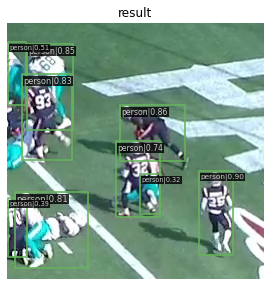

demo/input/58176_002844_Sideline_30_H93.jpg


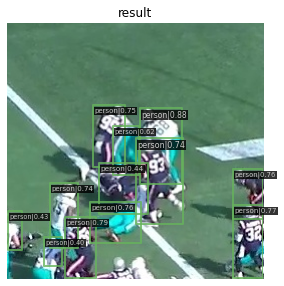

demo/input/58176_002844_Sideline_30_H95.jpg


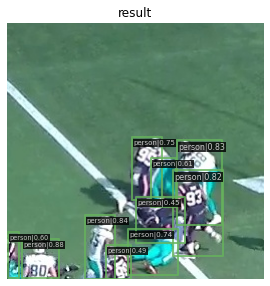

demo/input/58176_002844_Sideline_30_V67.jpg


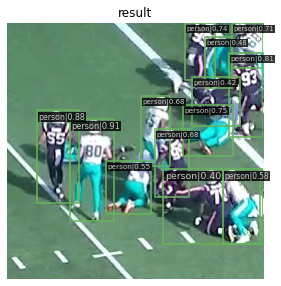

demo/input/58176_002844_Sideline_30_V81.jpg


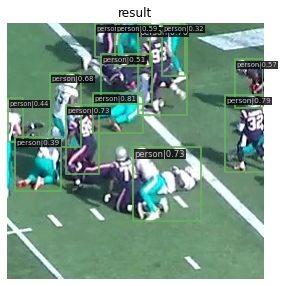

demo/input/58176_002844_Sideline_50_V14.jpg


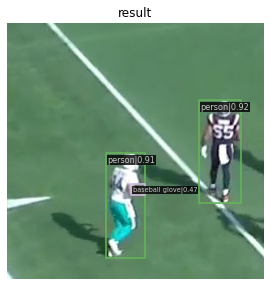

demo/input/58172_003247_Endzone_20_H57.jpg


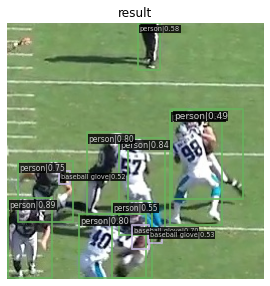

demo/input/58172_003247_Endzone_20_V38.jpg


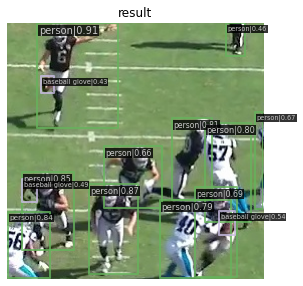

demo/input/58172_003247_Endzone_20_V58.jpg


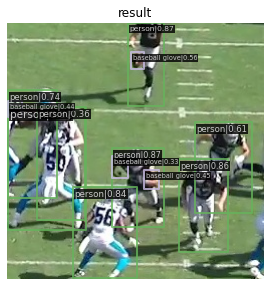

demo/input/58168_003392_Endzone_0_H42.jpg


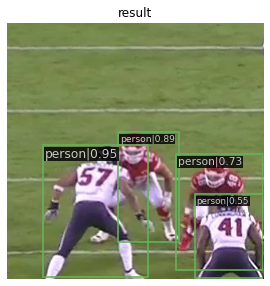

demo/input/58168_003392_Endzone_0_H72.jpg


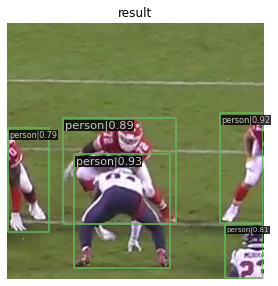

demo/input/58168_003392_Endzone_0_V23.jpg


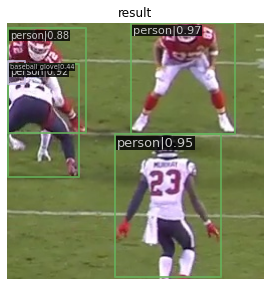

demo/input/58168_003392_Endzone_0_V55.jpg


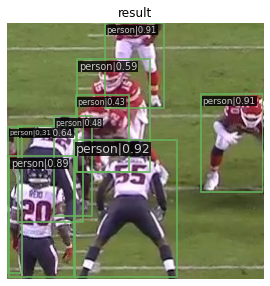

demo/input/58168_003392_Endzone_50_V20.jpg


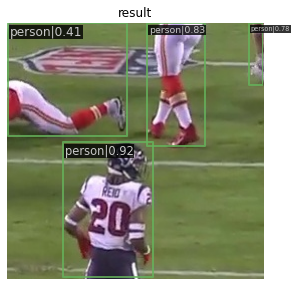

demo/input/58168_003392_Endzone_50_V99.jpg


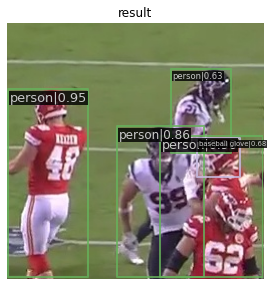

demo/input/58168_003392_Sideline_20_H72.jpg


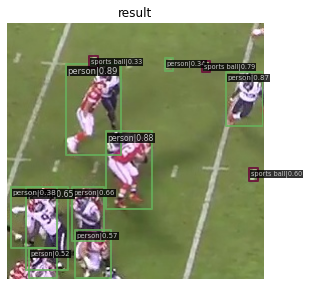

demo/input/58168_003392_Sideline_20_H77.jpg


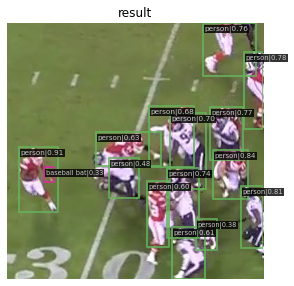

demo/input/58168_003392_Sideline_20_V59.jpg


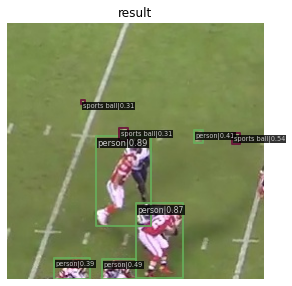

demo/input/58173_003606_Endzone_20_H51.jpg


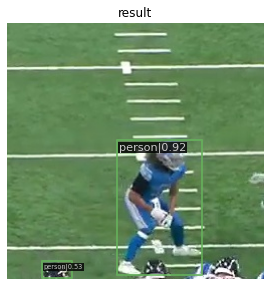

demo/input/58173_003606_Endzone_20_H93.jpg


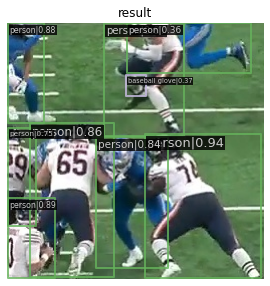

demo/input/58173_003606_Endzone_20_V70.jpg


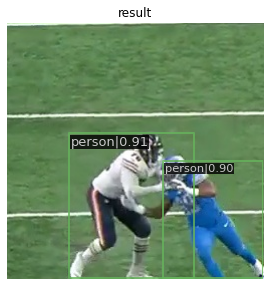

demo/input/58173_003606_Endzone_100_H90.jpg


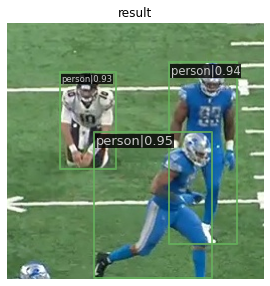

demo/input/58173_003606_Endzone_100_V74.jpg


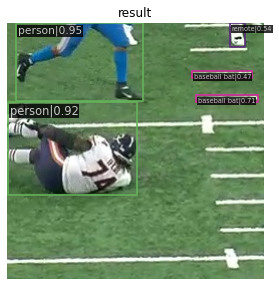

demo/input/58173_003606_Sideline_0_H29.jpg


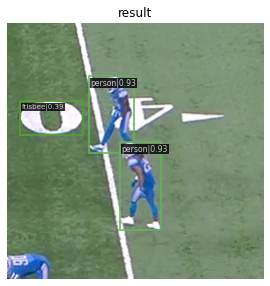

demo/input/58173_003606_Sideline_0_H59.jpg


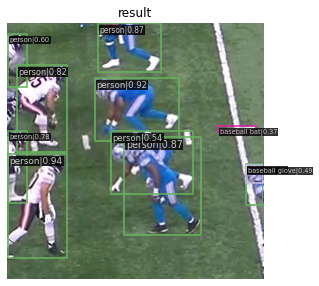

demo/input/58173_003606_Sideline_0_H90.jpg


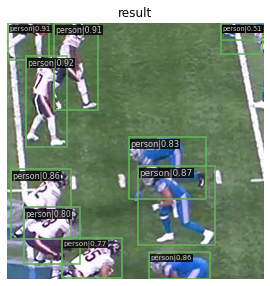

demo/input/58173_003606_Sideline_0_V29.jpg


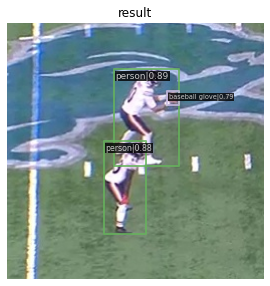

demo/input/58173_003606_Sideline_0_V72.jpg


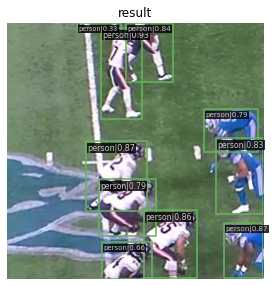

demo/input/58173_003606_Sideline_10_H26.jpg


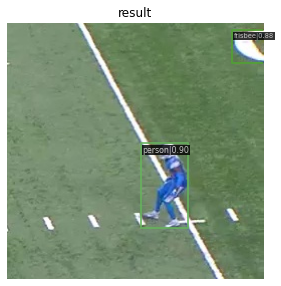

demo/input/58173_003606_Sideline_10_V74.jpg


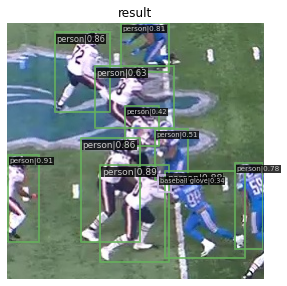

demo/input/58173_003606_Sideline_10_V80.jpg


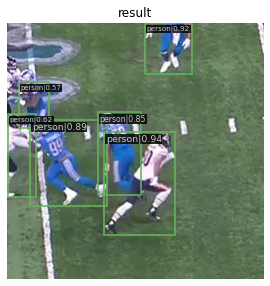

demo/input/58177_004239_Endzone_0_V23.jpg


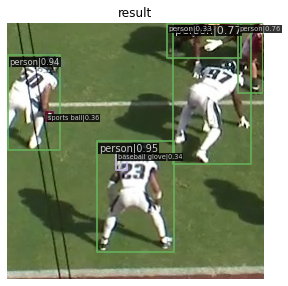

demo/input/58177_004239_Endzone_0_V91.jpg


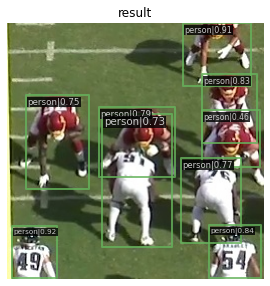

demo/input/58177_004239_Endzone_10_H82.jpg


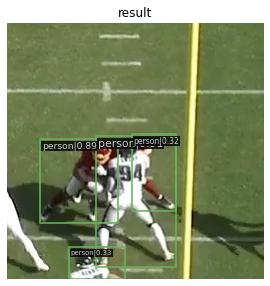

demo/input/58177_004239_Endzone_10_V76.jpg


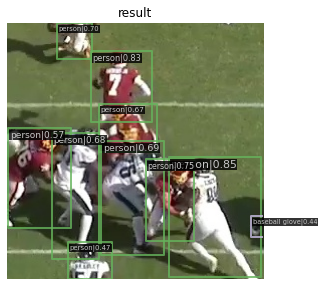

demo/input/58177_004239_Endzone_10_V91.jpg


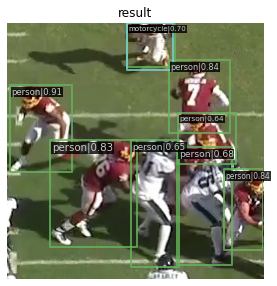

In [ ]:
# Use the detector to do inference
# list_imgs = ['58168_003392_Endzone_0.jpg','58168_003392_Endzone_50.jpg','58168_003392_Sideline_20.jpg','58172_003247_Endzone_20.jpg','58172_003247_Sideline_130.jpg','58173_003606_Endzone_20.jpg','58173_003606_Endzone_100.jpg','58173_003606_Sideline_0.jpg','58173_003606_Sideline_10.jpg','58174_001792_Sideline_0.jpg','58174_001792_Sideline_10.jpg','58176_002844_Sideline_30.jpg','58176_002844_Sideline_50.jpg','58177_004239_Endzone_0.jpg','58177_004239_Endzone_10.jpg','58177_004239_Endzone_20.jpg','58177_004239_Endzone_30.jpg','58177_004239_Endzone_40.jpg','58177_004239_Endzone_50.jpg','58177_004239_Sideline_70.jpg','58180_000986_Endzone_0.jpg','58180_000986_Endzone_10.jpg','58180_000986_Endzone_20.jpg','58180_000986_Endzone_30.jpg','58180_000986_Endzone_70.jpg','58180_000986_Endzone_80.jpg','58180_000986_Endzone_100.jpg','58180_000986_Sideline_120.jpg','58180_004644_Endzone_0.jpg','58190_000309_Endzone_50.jpg']
list_imgs = ['58174_001792_Sideline_0_H65.jpg','58174_001792_Sideline_10_H17.jpg','58174_001792_Sideline_10_H60.jpg','58174_001792_Sideline_10_H68.jpg','58174_001792_Sideline_10_H74.jpg','58174_001792_Sideline_10_H88.jpg','58174_001792_Sideline_10_V50.jpg','58174_001792_Sideline_10_V54.jpg','58174_001792_Sideline_10_V90.jpg','58174_001792_Sideline_10_V99.jpg','58176_002844_Sideline_30_H25.jpg','58176_002844_Sideline_30_H32.jpg','58176_002844_Sideline_30_H93.jpg','58176_002844_Sideline_30_H95.jpg','58176_002844_Sideline_30_V67.jpg','58176_002844_Sideline_30_V81.jpg','58176_002844_Sideline_50_V14.jpg','58172_003247_Endzone_20_H57.jpg','58172_003247_Endzone_20_V38.jpg','58172_003247_Endzone_20_V58.jpg','58168_003392_Endzone_0_H42.jpg','58168_003392_Endzone_0_H72.jpg','58168_003392_Endzone_0_V23.jpg','58168_003392_Endzone_0_V55.jpg','58168_003392_Endzone_50_V20.jpg','58168_003392_Endzone_50_V99.jpg','58168_003392_Sideline_20_H72.jpg','58168_003392_Sideline_20_H77.jpg','58168_003392_Sideline_20_V59.jpg','58173_003606_Endzone_20_H51.jpg','58173_003606_Endzone_20_H93.jpg','58173_003606_Endzone_20_V70.jpg','58173_003606_Endzone_100_H90.jpg','58173_003606_Endzone_100_V74.jpg','58173_003606_Sideline_0_H29.jpg','58173_003606_Sideline_0_H59.jpg','58173_003606_Sideline_0_H90.jpg','58173_003606_Sideline_0_V29.jpg','58173_003606_Sideline_0_V72.jpg','58173_003606_Sideline_10_H26.jpg','58173_003606_Sideline_10_V74.jpg','58173_003606_Sideline_10_V80.jpg','58177_004239_Endzone_0_V23.jpg','58177_004239_Endzone_0_V91.jpg','58177_004239_Endzone_10_H82.jpg','58177_004239_Endzone_10_V76.jpg','58177_004239_Endzone_10_V91.jpg']

for i in list_imgs:
  img = 'demo/input/'+i
  # img = 'demo/58168_003392_Endzone_frame_7.6 sec.jpg'
  # img = 'demo/output/img_11.jpg'
  result = inference_detector(model, img)
  print(img)
  show_result_pyplot(model, img, result, score_thr=0.3)

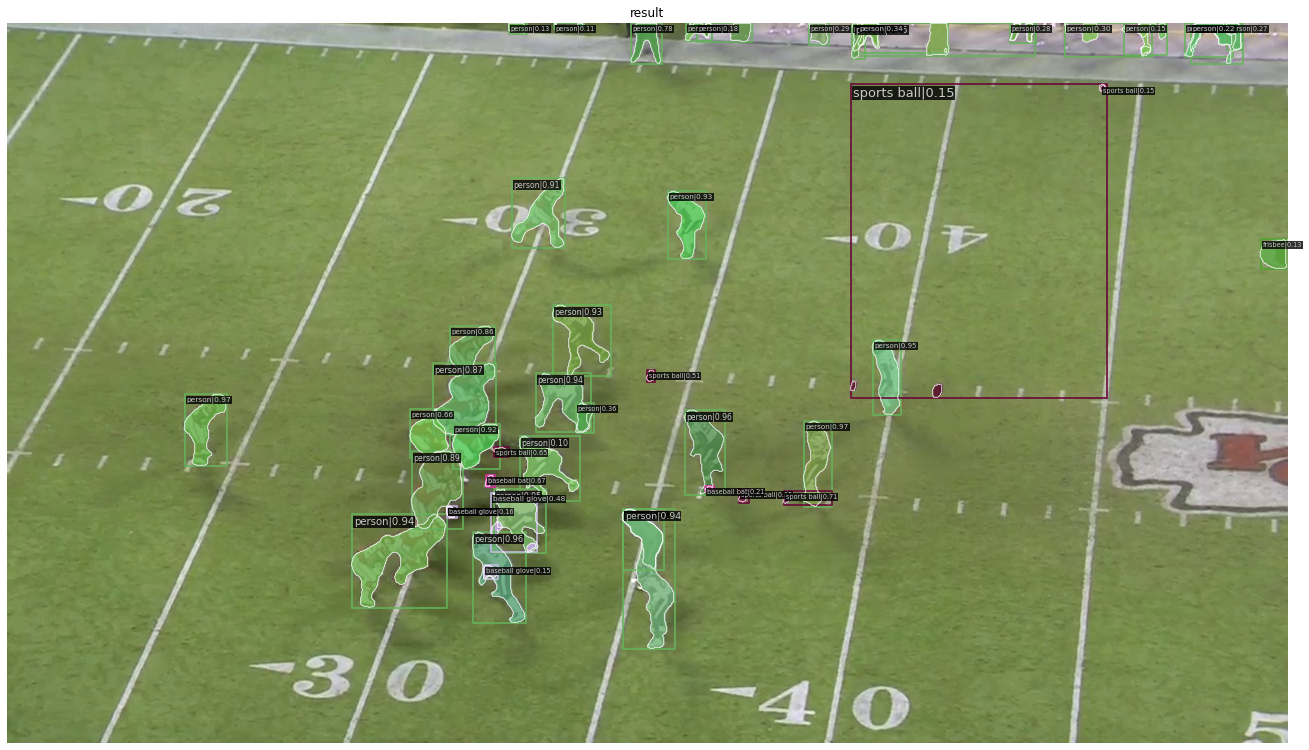

In [ ]:
# Let's plot the result
# show_result_pyplot(model, img, result, score_thr=0.3)

In [ ]:
# result = inference_detector(model, img)
import numpy as np
bbox_result = result
# if instance segmentation
# bbox_result, segm_result = result
labels = [
    np.full(bbox.shape[0], i, dtype=np.int32)\
    for i, bbox in enumerate(bbox_result)
]
labels = np.concatenate(labels)
bboxes = np.vstack(bbox_result)
labels_impt = np.where(bboxes[:, -1] > 0.3)[0]

classes = mmdet.core.evaluation.get_classes("coco")
labels_impt_list = [labels[i] for i in labels_impt]
labels_class = [classes[i] for i in labels_impt_list]

In [ ]:
# import numpy as np
# bbox_result = result
# # if instance segmentation
# # bbox_result, segm_result = result
# labels = [
#     np.full(bbox.shape[0], i, dtype=np.int32)\
#     for i, bbox in enumerate(bbox_result)
# ]
# labels = np.concatenate(labels)
# bboxes = np.vstack(bbox_result)
# labels_impt = np.where(bboxes[:, -1] > 0.3)[0]

# classes = mmdet.core.evaluation.get_classes("coco")
# labels_impt_list = [labels[i] for i in labels_impt]
# labels_class = [classes[i] for i in labels_impt_list]

In [ ]:
labels_class

['person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'person',
 'sports_ball',
 'baseball_glove',
 'baseball_glove']

In [ ]:
# bboxes

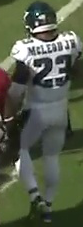

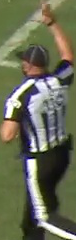

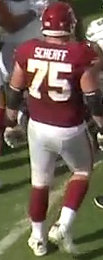

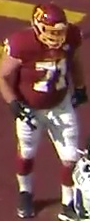

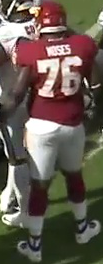

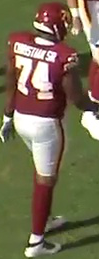

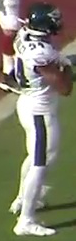

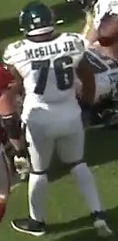

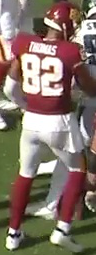

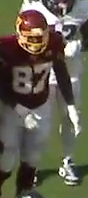

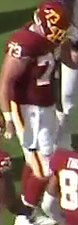

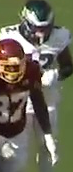

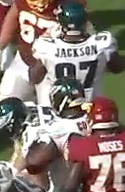

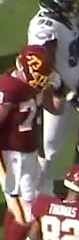

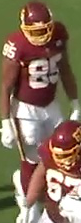

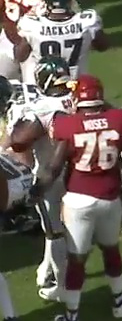

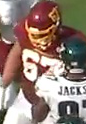

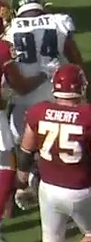

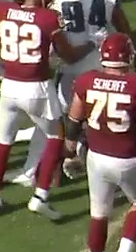

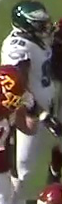

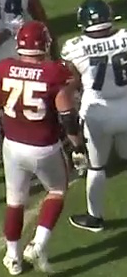

In [ ]:
# Importing Image class from PIL module
from PIL import Image

# Opens a image in RGB mode
im = Image.open(img)

# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size

# Setting the points for cropped image
for i in range(len(labels_impt)):
  if labels_class[i] == 'person':
    left = bboxes[labels_impt][i][0]
    top = bboxes[labels_impt][i][1]
    right = bboxes[labels_impt][i][2]
    bottom = bboxes[labels_impt][i][3]

    # Cropped image of above dimension
    # (It will not change original image)
    im1 = im.crop((left, top, right, bottom))

    # Shows the image in image viewer
    im1.show()
    im1.save('demo/output/img_' + str(i) + '.jpg')

In [ ]:
!zip -r demo/output.zip demo/output

  adding: demo/output/ (stored 0%)
  adding: demo/output/img_12.jpg (deflated 2%)
  adding: demo/output/img_20.jpg (deflated 2%)
  adding: demo/output/img_13.jpg (deflated 3%)
  adding: demo/output/img_16.jpg (deflated 3%)
  adding: demo/output/img_14.jpg (deflated 3%)
  adding: demo/output/img_15.jpg (deflated 1%)
  adding: demo/output/img_7.jpg (deflated 2%)
  adding: demo/output/img_8.jpg (deflated 2%)
  adding: demo/output/img_19.jpg (deflated 4%)
  adding: demo/output/img_3.jpg (deflated 3%)
  adding: demo/output/img_9.jpg (deflated 3%)
  adding: demo/output/img_4.jpg (deflated 2%)
  adding: demo/output/img_2.jpg (deflated 2%)
  adding: demo/output/img_11.jpg (deflated 4%)
  adding: demo/output/img_1.jpg (deflated 3%)
  adding: demo/output/img_10.jpg (deflated 3%)
  adding: demo/output/img_6.jpg (deflated 3%)
  adding: demo/output/img_0.jpg (deflated 3%)
  adding: demo/output/img_18.jpg (deflated 2%)
  adding: demo/output/img_17.jpg (deflated 2%)
  adding: demo/output/img_5.jpg (d